In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [3]:
path = '/home/kupaeva/Документы/train.csv'

In [4]:
df = pd.read_csv(path)

In [7]:
df

,pos,reads_all,matches,mismatches,deletions,insertions,A,C,T,G,A_fraction,T_fraction,G_fraction,C_fraction
0,279,8045,32,7972,46,8,7911.0,54.0,11.0,NaN,0.983503,0.000815,NaN,0.006896
1,280,8045,7995,48,19,9,NaN,16.0,13.0,19.0,NaN,0.001355,0.002392,0.001914
2,281,8045,7983,50,16,5,NaN,24.0,4.0,24.0,NaN,0.000639,0.002875,0.002310
3,282,8049,7510,505,33,65,105.0,11.0,395.0,NaN,0.012750,0.049096,NaN,0.000919
4,283,8042,7786,155,115,62,46.0,NaN,93.0,31.0,0.004960,0.010992,0.003186,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,337,8056,7542,471,58,7,NaN,63.0,47.0,367.0,NaN,0.004584,0.045444,0.007767
59,338,8061,7967,62,29,5,17.0,NaN,26.0,33.0,0.001060,0.002207,0.003992,NaN
60,339,8062,8002,48,14,3,14.0,14.0,33.0,NaN,0.001076,0.002953,NaN,0.001322
61,340,8061,7918,146,16,4,NaN,75.0,43.0,33.0,NaN,0.005307,0.002951,0.008808


In [33]:
df = df.rename(df.pos, axis='index')

In [95]:
mean_fraction = df[['A_fraction', 'T_fraction', 'G_fraction', 'C_fraction']]

In [96]:
mean_fraction

,A_fraction,T_fraction,G_fraction,C_fraction
279,0.983503,0.000815,NaN,0.006896
280,NaN,0.001355,0.002392,0.001914
281,NaN,0.000639,0.002875,0.002310
282,0.012750,0.049096,NaN,0.000919
283,0.004960,0.010992,0.003186,NaN
...,...,...,...,...
337,NaN,0.004584,0.045444,0.007767
338,0.001060,0.002207,0.003992,NaN
339,0.001076,0.002953,NaN,0.001322
340,NaN,0.005307,0.002951,0.008808


In [97]:
mean_fraction = mean_fraction.apply(lambda row: row.fillna(1 - row.sum()), axis=1)

In [98]:
mean_fraction

,A_fraction,T_fraction,G_fraction,C_fraction
279,0.983503,0.000815,0.008786,0.006896
280,0.994339,0.001355,0.002392,0.001914
281,0.994176,0.000639,0.002875,0.002310
282,0.012750,0.049096,0.937235,0.000919
283,0.004960,0.010992,0.003186,0.980862
...,...,...,...,...
337,0.942205,0.004584,0.045444,0.007767
338,0.001060,0.002207,0.003992,0.992741
339,0.001076,0.002953,0.994650,0.001322
340,0.982935,0.005307,0.002951,0.008808


<AxesSubplot:xlabel='position of nucleotide'>

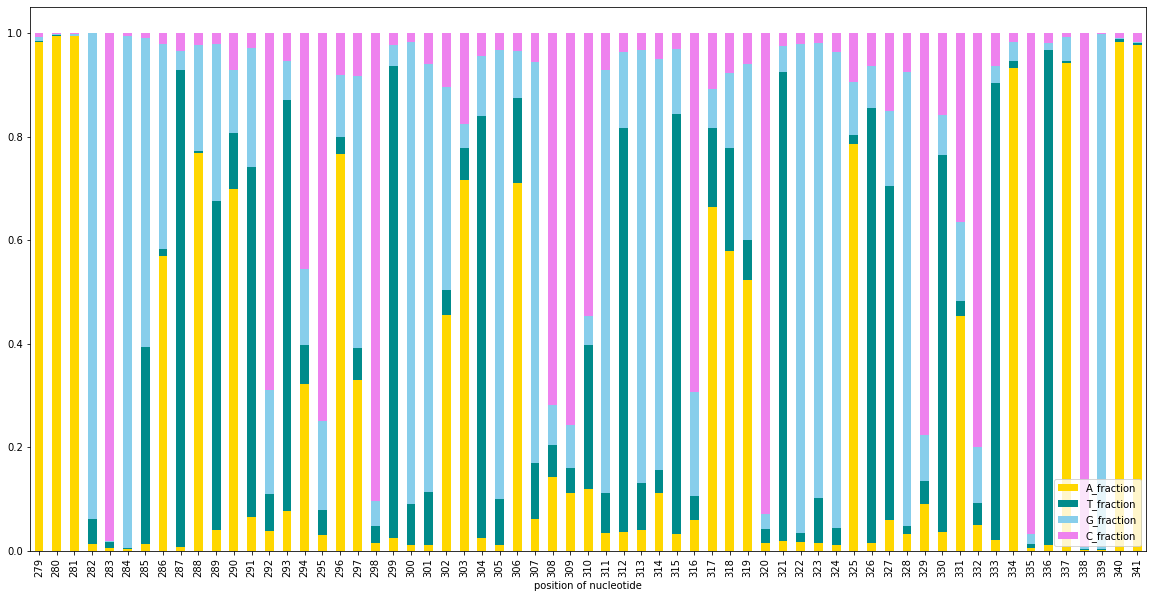

In [93]:
mean_fraction.plot(kind='bar', stacked=True, figsize=(20, 10),color = ['gold', 'darkcyan', 'skyblue', 'violet'], 
                   xlabel = 'position of nucleotide', ylabel = 'part of nucleotide', )

In [109]:
df.matches

279      32
280    7995
281    7983
282    7510
283    7786
       ... 
337    7542
338    7967
339    8002
340    7918
341    7869
Name: matches, Length: 63, dtype: int64

In [111]:
great_matches = df.loc[df.matches > df.matches.mean()]

In [114]:
great_matches = great_matches[['pos', 'reads_all', 'mismatches', 'deletions', 'insertions']]

In [ ]:
great_matches.to_csv(path_or_buf = '/home/kupaeva/Документы/train_part.csv')